In [1]:
''' import ''' 
import scipy.io as io
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

In [2]:
''' load data '''
data = io.loadmat('./data/hw2_prob2.mat')

A = data['A']
M, N = A.shape

In [3]:
''' hyper param '''
ALPHA = 0.01
BETA = 0.8
EPS = 1e-10
MAXITERS = 20000

''' constraint '''
D_max = 63
D_min = 59
D_95 = 60

In [4]:
''' with constraints (D_min, D_max, DVH) '''

# gradient desent method
f_hist = []

x = np.zeros((N, 1))

for i in range(MAXITERS):

    # f, grad
    d = A@x
    c_max = np.maximum(0, d - D_max)
    c_min = np.maximum(0, D_min - d)
    c_dvh = np.maximum(0, D_95 - d)

    f = sum(c_min**2 + c_max**2 + c_dvh**2)
    grad = 2*A.T@(c_max - c_min - c_dvh)

    # search direction (delta_x)
    delta_x = -grad

    # step size (t)
    t = 1
    # line search
    while True:
        dp = A@(x + t*delta_x)
        c_max_p = np.maximum(0, dp - D_max)
        c_min_p = np.maximum(0, D_min - dp)
        c_dvh_p = np.maximum(0, D_95 - dp)
        
        fp = sum(c_min_p**2 + c_max_p**2 + c_dvh_p**2)
        
        if (fp <= f + ALPHA*t*grad.T@delta_x):
            break
        
        t = BETA*t

    # update x (x_k+1 = x_k + t*delta_x)
    x = x + t*delta_x
    
    # history
    f_hist.append(f)

    print(f'i = {i}, f = {f}')

# optimal
x = x

i = 0, f = [21292567.]
i = 1, f = [10289725.02662075]
i = 2, f = [387293.54765366]
i = 3, f = [211335.53192048]
i = 4, f = [150166.75506781]
i = 5, f = [114823.0453264]
i = 6, f = [92416.78524319]
i = 7, f = [77172.45449172]
i = 8, f = [66173.98006861]
i = 9, f = [57915.93563857]
i = 10, f = [51528.75534348]
i = 11, f = [46447.07001113]
i = 12, f = [42307.32193482]
i = 13, f = [38862.3688375]
i = 14, f = [35949.365965]
i = 15, f = [33452.79508662]
i = 16, f = [31288.6486797]
i = 17, f = [29395.41936107]
i = 18, f = [27726.44066981]
i = 19, f = [26244.44429214]
i = 20, f = [24920.22792187]
i = 21, f = [23730.76820199]
i = 22, f = [22656.52015129]
i = 23, f = [21681.19876854]
i = 24, f = [20791.74235818]
i = 25, f = [19977.59986323]
i = 26, f = [19229.55720675]
i = 27, f = [18539.96040782]
i = 28, f = [17902.07423974]
i = 29, f = [17310.02380014]
i = 30, f = [16758.82817659]
i = 31, f = [16244.33412401]
i = 32, f = [15762.93988926]
i = 33, f = [15311.54819848]
i = 34, f = [14887.42132781

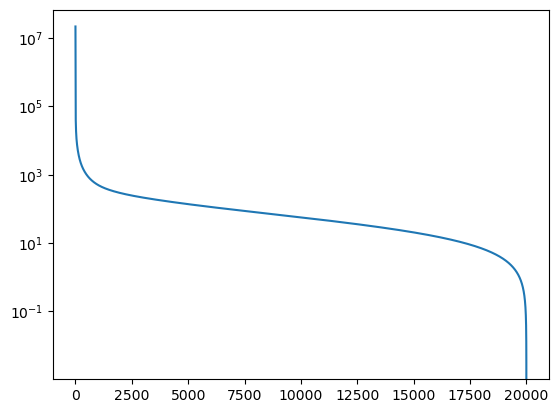

In [5]:
# plot
plt.semilogy(f_hist - f_hist[-1])
plt.show()

In [6]:
''' save '''
# np.savez('./opt/hw2_3.npz', A=A, x=x, f_hist=f_hist)

''' load '''
data = np.load('./opt/hw2_3.npz')

A = data['A']
x = data['x']
f_hist = data['f_hist']

In [7]:
''' DVH '''
def get_DVH_PTV(beam_kernel, beam_intensity):

    dose = beam_kernel@beam_intensity

    # differential DVH
    bins = np.linspace(0, 100, 1000)
    diff_DVH, _ = np.histogram(dose, bins=bins)

    # cumulative DVH
    cum_DVH = np.flip(np.cumsum(np.flip(diff_DVH)))
    cum_DVH = cum_DVH / np.max(cum_DVH) # normalize

    return cum_DVH

In [8]:
# calc
dvh = get_DVH_PTV(A, x)

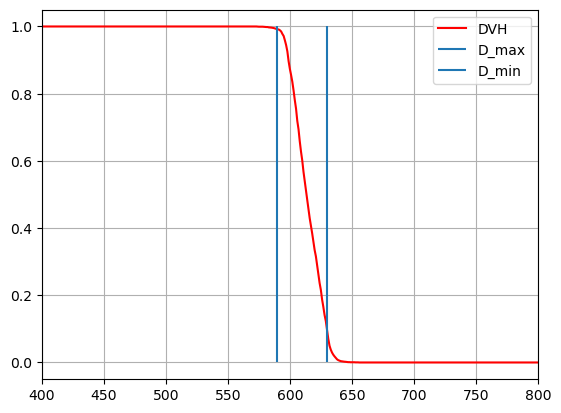

In [9]:
# plot
plt.plot(dvh, label='DVH', c='red')
plt.vlines(D_max*10, 0, 1, label='D_max')
plt.vlines(D_min*10, 0, 1, label='D_min')

plt.xlim([400, 800])
plt.legend()
plt.grid()
plt.show()